# Question (2)

## Libraries:

In [3]:
from sympy import latex, symbols, sin, cos, Matrix, simplify
from sympy import Matrix, eye
from IPython.display import display, Latex

### Defining $\epsilon_{ijk}$:

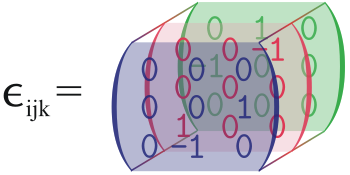

In [78]:
def levi_civita_tensor():
    epsilon = [[[0 for _ in range(3)] for _ in range(3)] for _ in range(3)]
    
    epsilon[0][1][2] = 1
    epsilon[1][2][0] = 1
    epsilon[2][0][1] = 1

    epsilon[0][2][1] = -1
    epsilon[2][1][0] = -1
    epsilon[1][0][2] = -1
    return sp.MutableDenseNDimArray(epsilon)

epsilon_tensor = levi_civita_tensor()
print("Levi-Civita:")
epsilon_tensor

Levi-Civita:


[[[0, 0, 0], [0, 0, 1], [0, -1, 0]], [[0, 0, -1], [0, 0, 0], [1, 0, 0]], [[0, 1, 0], [-1, 0, 0], [0, 0, 0]]]

In [72]:
def transpose_tensor(tensor):
    transposed = np.zeros_like(tensor)

    for i in range(3):
        for j in range(3):
            for k in range(3):
                transposed[i, j, k] = tensor[j, i, k]
    return transposed

epsilon_transpose = transpose_tensor(epsilon_tensor)

epsilon_transpose_sympy = sp.MutableDenseNDimArray(epsilon_transpose)
print("Levi-Civita_Transpose:")

epsilon_transpose_sympy

Levi-Civita_Transpose:


[[[0, 0, 0], [0, 0, -1], [0, 1, 0]], [[0, 0, 1], [0, 0, 0], [-1, 0, 0]], [[0, -1, 0], [1, 0, 0], [0, 0, 0]]]

# <center> $\therefore$ $\epsilon_{ijk}$ = - $\epsilon_{ijk}^T$

# Part(i):

## Symbols & vectors:

In [5]:
x, y, z, alpha, beta, phi = symbols('x y z alpha beta phi')

In [6]:
r = Matrix([x, y, z]) 
r

Matrix([
[x],
[y],
[z]])

In [7]:
n_hat = Matrix([sin(beta) * cos(alpha), sin(beta) * sin(alpha), cos(beta)])
n_hat

Matrix([
[sin(beta)*cos(alpha)],
[sin(alpha)*sin(beta)],
[           cos(beta)]])

## operations:

In [9]:
r_Cn = r.cross(n_hat)
r_Cn

Matrix([
[           y*cos(beta) - z*sin(alpha)*sin(beta)],
[          -x*cos(beta) + z*sin(beta)*cos(alpha)],
[x*sin(alpha)*sin(beta) - y*sin(beta)*cos(alpha)]])

In [10]:
r_Dn = r.dot(n_hat)
r_Dn

x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta)

## Rotated R:

In [12]:
r_prime = r * cos(phi) + r_Cn * sin(phi) + n_hat * (r_Dn) * (1 - cos(phi))
r_prime

Matrix([
[ x*cos(phi) + (1 - cos(phi))*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*sin(beta)*cos(alpha) + (y*cos(beta) - z*sin(alpha)*sin(beta))*sin(phi)],
[y*cos(phi) + (1 - cos(phi))*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*sin(alpha)*sin(beta) + (-x*cos(beta) + z*sin(beta)*cos(alpha))*sin(phi)],
[ z*cos(phi) + (1 - cos(phi))*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*cos(beta) + (x*sin(alpha)*sin(beta) - y*sin(beta)*cos(alpha))*sin(phi)]])

In [13]:
r_prime.simplify()
r_prime

Matrix([
[x*cos(phi) + (y*cos(beta) - z*sin(alpha)*sin(beta))*sin(phi) - (cos(phi) - 1)*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*sin(beta)*cos(alpha)],
[y*cos(phi) - (x*cos(beta) - z*sin(beta)*cos(alpha))*sin(phi) - (cos(phi) - 1)*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*sin(alpha)*sin(beta)],
[          z*cos(phi) + (x*sin(alpha) - y*cos(alpha))*sin(beta)*sin(phi) - (cos(phi) - 1)*(x*sin(beta)*cos(alpha) + y*sin(alpha)*sin(beta) + z*cos(beta))*cos(beta)]])

### Constructing $S$:

#### Vector Decomposition

For the rotation of a vector $ \mathbf{r} $, we first decompose it into two components:
- $ Parallel$ $Component:$ 
$ \mathbf{r}^{\parallel} $: This component is parallel to the axis of rotation $ \hat{\mathbf{n}} $. It is calculated by projecting $ \mathbf{r} $ onto $ \hat{\mathbf{n}} $:
    $
    \mathbf{r}^{\parallel} = (\hat{\mathbf{n}} \cdot \mathbf{r}) \hat{\mathbf{n}}
    $
    
- $ Perpendicular$  $Component:$
$ \mathbf{r}^{\perp} $: This component is perpendicular to the axis of rotation. It is calculated by subtracting the parallel component from $ \mathbf{r} $:
    $
    \mathbf{r}^{\perp} = \mathbf{r} - \mathbf{r}^{\parallel}
    $


#### Rotation Formula:

Once the vector is decomposed, we rotate the components.

Using the angle $\phi$ of rotation about $ \hat{\mathbf{n}} $, the rotated vector $\hat{\mathbf{r}} $ is given by:
$
\hat{\mathbf{r}} = \mathbf{r}^{\parallel} + \mathbf{r}^{\perp} \cos(\phi) + (\hat{\mathbf{n}} \times \mathbf{r}) \sin(\phi)
$
1) The parallel component $ \mathbf{r}^{\parallel} $ remains unchanged.
2) The perpendicular component $ \mathbf{r}^{\perp} $ is scaled by $\cos(\phi)$.
3) The component perpendicular to both $ \hat{\mathbf{n}} $ and $\mathbf{r} $ the cross product $\hat{\mathbf{n}} \times \mathbf{r} $ is rotated by $ \sin(\phi) $.

In [17]:
S = Matrix.zeros(3, 3)
for i in range(3):
    expr = r[i] * cos(phi) + r_Cn[i] * sin(phi) + n_hat[i] * r_Dn * (1 - cos(phi))
    for j in range(3):
        expr_substituted = expr.subs({x: 1 if j == 0 else 0, y: 1 if j == 1 else 0, z: 1 if j == 2 else 0})
        S[i, j] = expr_substituted.simplify()
S

Matrix([
[                   (1 - cos(phi))*sin(beta)**2*cos(alpha)**2 + cos(phi), -(cos(phi) - 1)*sin(alpha)*sin(beta)**2*cos(alpha) + sin(phi)*cos(beta), (-(cos(phi) - 1)*cos(alpha)*cos(beta) - sin(alpha)*sin(phi))*sin(beta)],
[-(cos(phi) - 1)*sin(alpha)*sin(beta)**2*cos(alpha) - sin(phi)*cos(beta),                    (1 - cos(phi))*sin(alpha)**2*sin(beta)**2 + cos(phi), (-(cos(phi) - 1)*sin(alpha)*cos(beta) + sin(phi)*cos(alpha))*sin(beta)],
[ (-(cos(phi) - 1)*cos(alpha)*cos(beta) + sin(alpha)*sin(phi))*sin(beta),  (-(cos(phi) - 1)*sin(alpha)*cos(beta) - sin(phi)*cos(alpha))*sin(beta),                                 (1 - cos(phi))*cos(beta)**2 + cos(phi)]])

## Checking:

In [19]:
r_Ch = S.T * r_prime 
r_Ch.simplify()
r_Ch

Matrix([
[x],
[y],
[z]])

# Part(ii):

### Checking orthagonality of $S$:

In [22]:
S_T = S.T
S_T.simplify()
S_T

Matrix([
[                   (1 - cos(phi))*sin(beta)**2*cos(alpha)**2 + cos(phi), -(cos(phi) - 1)*sin(alpha)*sin(beta)**2*cos(alpha) - sin(phi)*cos(beta), -((cos(phi) - 1)*cos(alpha)*cos(beta) - sin(alpha)*sin(phi))*sin(beta)],
[-(cos(phi) - 1)*sin(alpha)*sin(beta)**2*cos(alpha) + sin(phi)*cos(beta),                    (1 - cos(phi))*sin(alpha)**2*sin(beta)**2 + cos(phi), -((cos(phi) - 1)*sin(alpha)*cos(beta) + sin(phi)*cos(alpha))*sin(beta)],
[ -((cos(phi) - 1)*cos(alpha)*cos(beta) + sin(alpha)*sin(phi))*sin(beta),  -((cos(phi) - 1)*sin(alpha)*cos(beta) - sin(phi)*cos(alpha))*sin(beta),                                 (1 - cos(phi))*cos(beta)**2 + cos(phi)]])

In [23]:
I = S * S_T
I.simplify()
I

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])